In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import joblib

In [3]:
dummy = pd.read_csv("./preprocessed_data.csv")

In [4]:
dummy

,Crop_Year,Area,Production,District_Name_24 PARAGANAS NORTH,District_Name_24 PARAGANAS SOUTH,District_Name_ADILABAD,District_Name_AGAR MALWA,District_Name_AGRA,District_Name_AHMADABAD,District_Name_AHMEDNAGAR,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,0.166667,1.461405e-04,1.598977e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.166667,2.214426e-07,7.994883e-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.166667,1.187632e-05,2.566358e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.166667,2.050093e-05,5.124720e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.166667,8.390345e-05,1.319156e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242356,0.944444,3.565227e-05,6.403902e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242357,0.944444,7.306442e-05,3.701631e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242358,0.944444,3.775014e-05,1.299169e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242359,0.944444,3.253469e-02,4.780133e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
from sklearn.model_selection import train_test_split

x = dummy.drop(["Production"], axis=1)
y = dummy["Production"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=5)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (181770, 778)
x_test : (60591, 778)
y_train : (181770,)
y_test : (60591,)


In [6]:
x_train
y_train

,Crop_Year,Area,District_Name_24 PARAGANAS NORTH,District_Name_24 PARAGANAS SOUTH,District_Name_ADILABAD,District_Name_AGAR MALWA,District_Name_AGRA,District_Name_AHMADABAD,District_Name_AHMEDNAGAR,District_Name_AIZAWL,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
197537,0.888889,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188424,0.055556,0.000629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43728,0.166667,0.000346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32733,0.888889,0.000025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61774,0.500000,0.000198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232422,0.166667,0.000024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124605,0.555556,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20463,0.444444,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18638,0.777778,0.000290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


197537    8.794372e-09
188424    1.598977e-06
43728     2.042693e-06
32733     1.399105e-07
61774     1.119284e-06
              ...     
232422    1.111289e-07
124605    3.517749e-08
20463     2.158618e-08
18638     3.820755e-06
35683     6.475855e-08
Name: Production, Length: 181770, dtype: float64

<b><h3> Linear Regression </b></h3>

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [8]:
lr_predict = model.predict(x_test)
lr_predict

array([-0.00012026,  0.00038806, -0.00101462, ...,  0.00011351,
       -0.00138834,  0.00022961])

In [9]:
model.score(x_test,y_test)

0.1783199677700671

In [10]:
from sklearn.metrics import r2_score
r = r2_score(y_test,lr_predict)
print("R2 score : ",r)

R2 score :  0.1783199677700671


Text(0.5, 0, 'Actual')

Text(0, 0.5, 'Predicted')

Text(0.5, 1.0, 'Linear Regression')

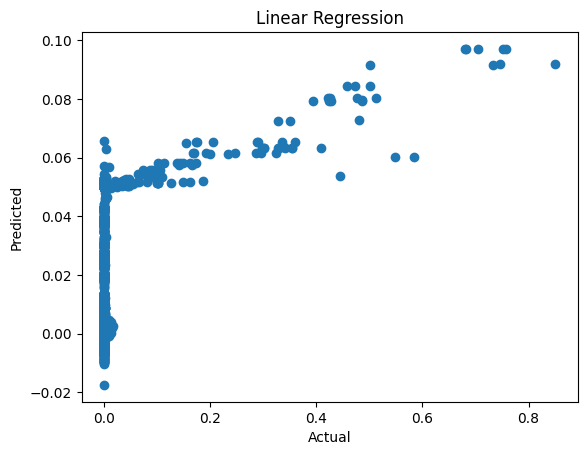

In [11]:
plt.scatter(y_test,lr_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

Clearly, the dataset is not good for linear regression.

In [12]:
joblib.dump(model, "./lr_model.pkl")
print("Model saved successfully.")

['./lr_model.pkl']

Model saved successfully.


In [13]:
model = joblib.load("./lr_model.pkl")
print("Model loaded successfully.")

Model loaded successfully.


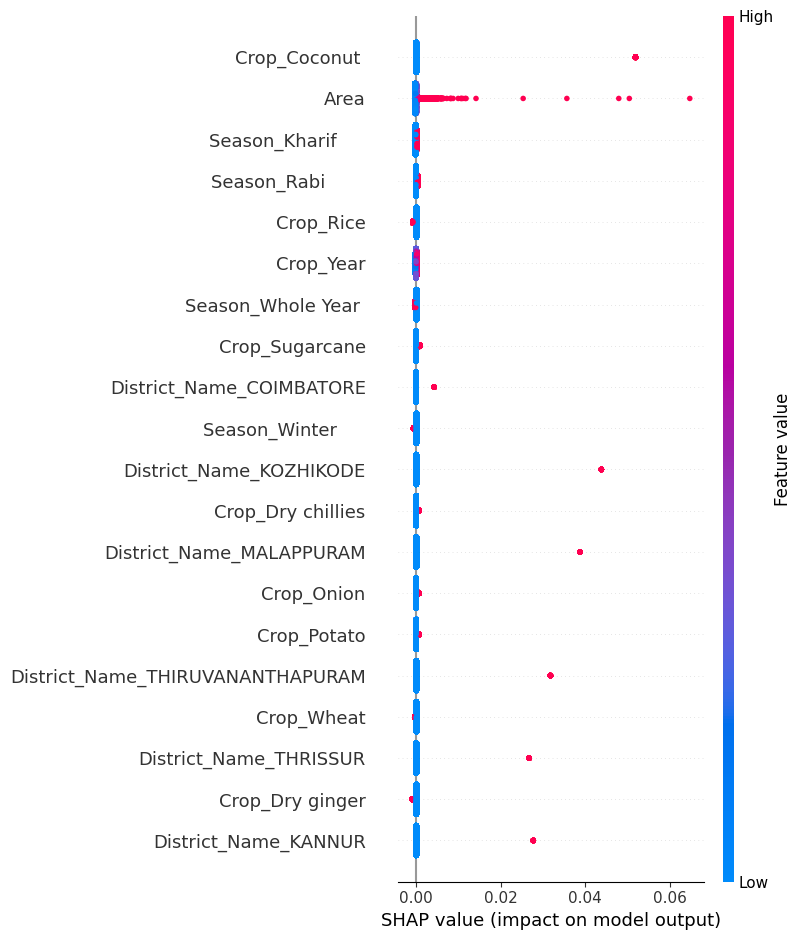

In [14]:
explainer = shap.Explainer(model, x_train)
shap_values = explainer(x_test)

shap.summary_plot(shap_values, x_test)

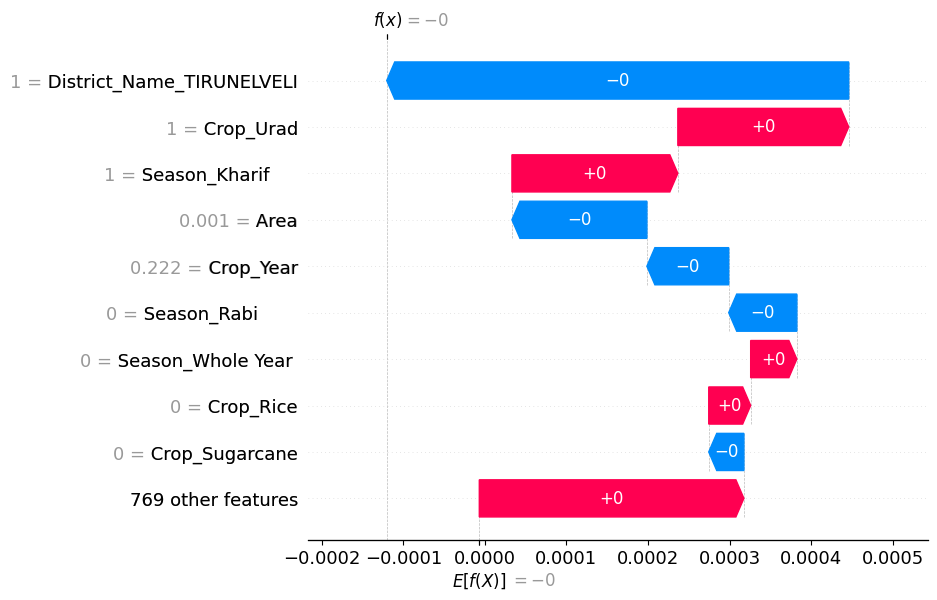

In [15]:
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[0],  
        base_values=explainer.expected_value, 
        data=x_test.iloc[0, :],  
        feature_names=x_test.columns  
    )
)


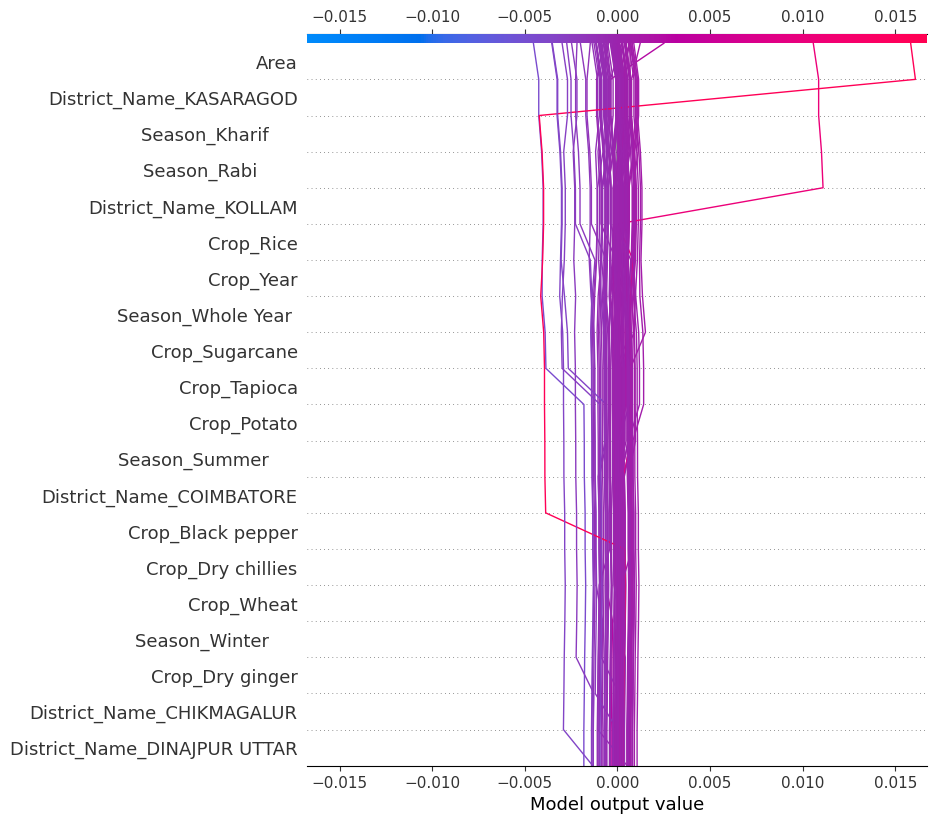

In [16]:
shap.decision_plot(explainer.expected_value, shap_values.values[:100], x_test.iloc[:10])


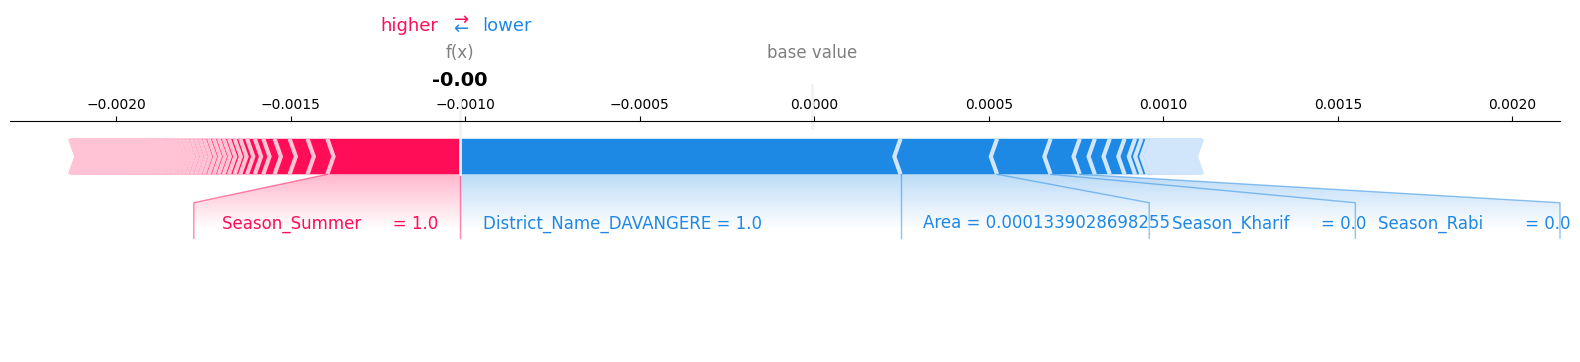

In [17]:
shap.force_plot(
    explainer.expected_value, 
    shap_values.values[2], 
    x_test.iloc[2, :], 
    matplotlib=True
)
